In [1]:
#primero creamos la conexión con MySQL
import mysql.connector

conexion = mysql.connector.connect (user='root', password ='112s@112',
                                    host='localhost',
                                    database='sprint4',
                                    port='3306')
print(conexion)


In [2]:
#Llamamos a pandas:
import pandas as pd

companies = pd.read_sql("SELECT * FROM companies", conexion)
credit_cards = pd.read_sql("SELECT * FROM credit_cards", conexion)
products = pd.read_sql("SELECT * FROM products", conexion)
transaction_products = pd.read_sql("SELECT * FROM transaction_products", conexion)
transactions = pd.read_sql("SELECT * FROM transactions", conexion)
users = pd.read_sql("SELECT * FROM users", conexion)



C:\Users\sguti\AppData\Local\Temp\ipykernel_22928\1917698297.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  companies = pd.read_sql("SELECT * FROM companies", conexion)
C:\Users\sguti\AppData\Local\Temp\ipykernel_22928\1917698297.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  credit_cards = pd.read_sql("SELECT * FROM credit_cards", conexion)
C:\Users\sguti\AppData\Local\Temp\ipykernel_22928\1917698297.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  products = pd.read_sql("SELECT * FROM products", conexion)
C:\

A partir de aquí vamos mirando cada uno de los dataframes para asegurarnos de que los datos se hayan subido de manera correcta y limpiamos nulos o los substituimos y hacemos los cambios que necesitemos en las variables

In [3]:
print(type(companies),
      type(credit_cards),
      type(products),
      type(transaction_products),
      type(transactions),
      type(users))


<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [4]:
print(companies.info())
companies.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_id    100 non-null    object
 1   company_name  100 non-null    object
 2   phone         100 non-null    object
 3   email         100 non-null    object
 4   country       100 non-null    object
 5   website       100 non-null    object
dtypes: object(6)
memory usage: 4.8+ KB
None


,company_id,company_name,phone,email,country,website
0,b-2222,Ac Fermentum Incorporated,06 85 56 52 33,donec.porttitor.tellus@yahoo.net,Germany,https://instagram.com/site\r
1,b-2226,Magna A Neque Industries,04 14 44 64 62,risus.donec.nibh@icloud.org,Australia,https://whatsapp.com/group/9\r
2,b-2230,Fusce Corp.,08 14 97 58 85,risus@protonmail.edu,United States,https://pinterest.com/sub/cars\r
3,b-2234,Convallis In Incorporated,06 66 57 29 50,mauris.ut@aol.couk,Germany,https://cnn.com/user/110\r
4,b-2238,Ante Iaculis Nec Foundation,08 23 04 99 53,sed.dictum.proin@outlook.ca,New Zealand,https://netflix.com/settings\r
5,b-2242,Donec Ltd,01 25 51 37 37,at.iaculis@hotmail.couk,Norway,https://nytimes.com/user/110\r
6,b-2246,Sed Nunc Ltd,02 62 64 73 48,nibh@yahoo.org,United Kingdom,https://cnn.com/one\r
7,b-2250,Amet Nulla Donec Corporation,07 15 25 14 74,mattis.integer.eu@protonmail.net,Italy,https://netflix.com/sub/cars\r
8,b-2254,Nascetur Ridiculus Mus Inc.,06 26 87 61 84,suspendisse.dui@icloud.net,United States,https://ebay.com/sub\r
9,b-2258,Vestibulum Lorem PC,02 02 87 33 40,aenean.massa.integer@aol.net,Belgium,https://pinterest.com/sub/cars\r


In [5]:
print(products.info())
products.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            100 non-null    object 
 1   Product_name  100 non-null    object 
 2   Price         100 non-null    object 
 3   Colour        100 non-null    object 
 4   Weight        100 non-null    float64
 5   Warehouse_id  100 non-null    object 
dtypes: float64(1), object(5)
memory usage: 4.8+ KB
None


,id,Product_name,Price,Colour,Weight,Warehouse_id
0,1,Direwolf Stannis,$161.11,#7c7c7c,1.0,WH-4
1,10,Karstark Dorne,$119.52,#f4f4f4,2.4,WH--5
2,100,south duel,$40.43,#6d6d6d,3.0,WH--95
3,11,Karstark Dorne,$49.70,#141414,2.7,WH--6
4,12,duel Direwolf,$181.60,#a8a8a8,2.1,WH--7
5,13,palpatine chewbacca,$139.59,#2b2b2b,1.0,WH--8
6,14,Direwolf,$147.53,#c4c4c4,2.0,WH--9
7,15,Stannis warden,$194.29,#dbdbdb,1.5,WH--10
8,16,the duel warden,$180.91,#666666,3.0,WH--11
9,17,skywalker ewok sith,$91.89,#7c7c7c,3.2,WH--12


In [6]:
#Nos damos cuanta que price es un object y además tiene el simbolo del $, por lo tanto lo cambiamos
import pandas as pd
products['Price']=products['Price'].str.replace('$',' ')
products['Price']=products['Price'].astype(float)
#Y weight también necesitamos que sea un float:
products['Weight']=products['Weight'].astype(float)

products.head()

,id,Product_name,Price,Colour,Weight,Warehouse_id
0,1,Direwolf Stannis,161.11,#7c7c7c,1.0,WH-4
1,10,Karstark Dorne,119.52,#f4f4f4,2.4,WH--5
2,100,south duel,40.43,#6d6d6d,3.0,WH--95
3,11,Karstark Dorne,49.70,#141414,2.7,WH--6
4,12,duel Direwolf,181.60,#a8a8a8,2.1,WH--7


In [7]:
#Vemos que todos los datos son object, pero en principio no vamos a hacer ninguna operación con pin, pan, cvv que
#implique la necesidad de que sean INT.
print(credit_cards.info())
credit_cards.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             275 non-null    object
 1   user_id        275 non-null    object
 2   iban           275 non-null    object
 3   pan            275 non-null    object
 4   pin            275 non-null    object
 5   cvv            275 non-null    object
 6   track1         275 non-null    object
 7   track2         275 non-null    object
 8   expiring_date  275 non-null    object
dtypes: object(9)
memory usage: 19.5+ KB
None


,id,user_id,iban,pan,pin,cvv,track1,track2,expiring_date
0,CcU-2938,275,TR301950312213576817638661,5424465566813633,3257,984,%B8383712448554646^WovsxejDpwiev^86041142?7,%B7653863056044187=8007163336?3,10/30/22
1,CcU-2945,274,DO26854763748537475216568689,5142423821948828,9080,887,%B4621311609958661^UftuyfsSeimxn^0610628241?7,%B4149568437843501=5107140330?1,08/24/23
2,CcU-2952,273,BG45IVQL52710525608255,4556 453 55 5287,4598,438,%B2183285104307501^CddyytcUxwfdq^5907955430?9,%B6778580257827162=69068597400?7,06/29/21
3,CcU-2959,272,CR7242477244335841535,372461377349375,3583,667,%B7281111956795320^XocddijBckecd^09016253?3,%B4246154489281853=2805223916?8,02/24/23
4,CcU-2966,271,BG72LKTQ15627628377363,448566 886747 7265,4900,130,%B4728932322756223^JhlgvsuFbmwgj^72022894943?7,%B2318571115599881=8908215784?5,10/29/24
5,CcU-2973,270,PT87806228135092429456346,544 58654 54343 384,8760,887,%B4761405253275637^HjnnipoBlejrl^7108515632?1,%B7816169831446746=13102772?9,01/30/25
6,CcU-2980,269,DE39241881883086277136,402400 7145845969,5075,596,%B7320483593870549^OokzqxrHpased^49017394?3,%B2474313962214151=0412219131?5,07/24/22
7,CcU-2987,268,GE89681434837748781813,3763 747687 76666,2298,797,%B4750646345146674^PjmlyrfGwwtrf^83051712?6,%B5441935173418615=4103704536?7,10/31/23
8,CcU-2994,267,BH62714428368066765294,344283273252593,7545,595,%B1583759784015674^GmqoyhtUtoqrn^25078511?7,%B4141467473024349=65068009550?4,02/28/22
9,CcU-3001,266,CY49087426654774581266832110,511722 924833 2244,9562,867,%B6227288756728648^AwxilfcFmgvdy^2808804611?8,%B3429355750963453=5305268305?3,09/16/22


In [8]:
print(transaction_products.info())
transaction_products.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1457 entries, 0 to 1456
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   transaction_id  1457 non-null   object
 1   product_id      1457 non-null   object
dtypes: object(2)
memory usage: 22.9+ KB
None


,transaction_id,product_id
0,2F499B4D-4DC7-B337-010D-8B7471812A80,1
1,6ADF86D5-DD32-BC6F-D157-8C836F5BEF67,1
2,D3470F3E-9683-799A-40F1-E42C143BAC5A,1
3,EAE19DC1-C847-6D79-673D-00E7696AC336,1
4,CDCDE7A5-39CD-9ABD-59D5-71641582C825,11
5,CDCDE7A5-39CD-9ABD-59D5-71641582C825,67
6,CDCDE7A5-39CD-9ABD-59D5-71641582C825,13
7,CDCDE7A5-39CD-9ABD-59D5-71641582C825,1
8,1753A288-9FC1-52E6-5C39-A1FFB97B0D3A,31
9,1753A288-9FC1-52E6-5C39-A1FFB97B0D3A,89


In [9]:
print(users.info())
users.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           275 non-null    object
 1   name         275 non-null    object
 2   surname      275 non-null    object
 3   phone        275 non-null    object
 4   email        275 non-null    object
 5   birth_date   275 non-null    object
 6   country      275 non-null    object
 7   city         275 non-null    object
 8   postal_code  275 non-null    object
 9   address      275 non-null    object
 10  region       275 non-null    object
dtypes: object(11)
memory usage: 23.8+ KB
None


,id,name,surname,phone,email,birth_date,country,city,postal_code,address,region
0,1,Zeus,Gamble,1-282-581-0551,interdum.enim@protonmail.edu,"Nov 17, 1985",United States,Lowell,73544,348-7818 Sagittis St.,USA
1,10,Robert,Mccarthy,(324) 746-6771,fermentum@protonmail.com,"Apr 30, 1984",United States,Eugene,85526,"P.O. Box 773, 3594 Ornare St.",USA
2,100,Melodie,Mclean,1-677-221-7152,risus.varius@google.ca,"Sep 15, 1989",United States,College,11838,Ap #644-8492 Sagittis St.,USA
3,101,Sarah,Beck,(358) 691-4345,vitae.risus@aol.couk,"Apr 9, 1983",United States,Great Falls,67129,"665-9047 In, Rd.",USA
4,102,Jasper,Landry,1-397-765-1118,consectetuer.euismod@aol.org,"Apr 16, 1982",United States,Columbus,11595,Ap #374-7325 Sodales Rd.,USA
5,103,Upton,Chavez,(227) 785-6484,euismod.est@aol.ca,"Mar 15, 1986",United States,Essex,95631,"1990 Vel, Av.",USA
6,104,Martha,Barlow,(732) 326-5448,vulputate@hotmail.net,"Oct 29, 1988",United States,Chicago,41512,Ap #311-7103 In Avenue,USA
7,105,Hashim,Rose,(858) 313-6727,urna@icloud.com,"Mar 28, 1983",United States,Tacoma,99632,"8034 Tortor, Road",USA
8,106,Tanner,Valenzuela,1-346-421-3135,nascetur.ridiculus@google.net,"Apr 6, 1993",United States,Naperville,31130,Ap #114-2616 Fusce Road,USA
9,107,Victor,Valencia,(239) 569-1938,non.enim@hotmail.couk,"May 1, 1998",United States,Warren,15158,Ap #182-9926 At St.,USA


In [10]:
#Cambiamos birth_date de object a formato fecha:
import pandas as pd
users["birth_date"]=pd.to_datetime(users["birth_date"], format='%b %d, %Y')
print(users.info())
users.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           275 non-null    object        
 1   name         275 non-null    object        
 2   surname      275 non-null    object        
 3   phone        275 non-null    object        
 4   email        275 non-null    object        
 5   birth_date   275 non-null    datetime64[ns]
 6   country      275 non-null    object        
 7   city         275 non-null    object        
 8   postal_code  275 non-null    object        
 9   address      275 non-null    object        
 10  region       275 non-null    object        
dtypes: datetime64[ns](1), object(10)
memory usage: 23.8+ KB
None


,id,name,surname,phone,email,birth_date,country,city,postal_code,address,region
0,1,Zeus,Gamble,1-282-581-0551,interdum.enim@protonmail.edu,1985-11-17,United States,Lowell,73544,348-7818 Sagittis St.,USA
1,10,Robert,Mccarthy,(324) 746-6771,fermentum@protonmail.com,1984-04-30,United States,Eugene,85526,"P.O. Box 773, 3594 Ornare St.",USA
2,100,Melodie,Mclean,1-677-221-7152,risus.varius@google.ca,1989-09-15,United States,College,11838,Ap #644-8492 Sagittis St.,USA
3,101,Sarah,Beck,(358) 691-4345,vitae.risus@aol.couk,1983-04-09,United States,Great Falls,67129,"665-9047 In, Rd.",USA
4,102,Jasper,Landry,1-397-765-1118,consectetuer.euismod@aol.org,1982-04-16,United States,Columbus,11595,Ap #374-7325 Sodales Rd.,USA
5,103,Upton,Chavez,(227) 785-6484,euismod.est@aol.ca,1986-03-15,United States,Essex,95631,"1990 Vel, Av.",USA
6,104,Martha,Barlow,(732) 326-5448,vulputate@hotmail.net,1988-10-29,United States,Chicago,41512,Ap #311-7103 In Avenue,USA
7,105,Hashim,Rose,(858) 313-6727,urna@icloud.com,1983-03-28,United States,Tacoma,99632,"8034 Tortor, Road",USA
8,106,Tanner,Valenzuela,1-346-421-3135,nascetur.ridiculus@google.net,1993-04-06,United States,Naperville,31130,Ap #114-2616 Fusce Road,USA
9,107,Victor,Valencia,(239) 569-1938,non.enim@hotmail.couk,1998-05-01,United States,Warren,15158,Ap #182-9926 At St.,USA


In [11]:
print(transactions.info())
transactions.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587 entries, 0 to 586
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           587 non-null    object        
 1   card_id      587 non-null    object        
 2   business_id  587 non-null    object        
 3   timestamp    587 non-null    datetime64[ns]
 4   amount       587 non-null    float64       
 5   decline      587 non-null    int64         
 6   product_ids  587 non-null    object        
 7   user_id      587 non-null    object        
 8   lat          587 non-null    float64       
 9   longitude    587 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 46.0+ KB
None


,id,card_id,business_id,timestamp,amount,decline,product_ids,user_id,lat,longitude
0,02C6201E-D90A-1859-B4EE-88D2986D3B02,CcU-2938,b-2362,2021-08-28 23:42:24,466.92,0,"71, 1, 19",92,81.9185,-12.5276
1,0466A42E-47CF-8D24-FD01-C0B689713128,CcU-4219,b-2302,2021-07-26 07:29:18,49.53,0,"47, 97, 43",170,-43.9695,-117.5250
2,063FBA79-99EC-66FB-29F7-25726D1764A5,CcU-2987,b-2250,2022-01-06 21:25:27,92.61,0,"47, 67, 31, 5",275,-81.2227,-129.0500
3,0668296C-CDB9-A883-76BC-2E4C44F8C8AE,CcU-3743,b-2618,2022-01-26 02:07:14,394.18,0,"89, 83, 79",265,-34.3593,-100.5560
4,06CD9AA5-9B42-D684-DDDD-A5E394FEBA99,CcU-2959,b-2346,2021-10-26 23:00:01,279.93,0,"43, 31",92,33.7381,158.2980
5,07A46D48-31A3-7E87-65B9-0DA902AD109F,CcU-3225,b-2386,2021-06-28 21:11:42,340.87,1,"47, 23",272,38.8342,92.1905
6,09DE92CE-6F27-2BB7-13B5-9385B2B3B8E2,CcU-3071,b-2298,2021-05-11 20:40:06,303.05,1,"67, 7",275,71.1706,10.5757
7,0A476ED9-0C13-1962-F87B-D3563924B539,CcU-4359,b-2302,2022-02-26 20:33:54,430.49,0,"29, 41, 11",221,-56.4901,114.8010
8,0BEB80B7-9D66-1707-CE4B-9DC7E71914B5,CcU-3141,b-2338,2022-03-04 14:54:35,288.81,1,"19, 41, 29, 3",272,23.3264,-13.6037
9,0C7C3A33-9947-3BC1-846D-7BE3D0D17598,CcU-3309,b-2434,2021-04-10 20:58:41,103.44,1,"89, 31",272,63.3615,-68.6667


## NIVEL 1

- Exercici 1

    Una variable numèrica.

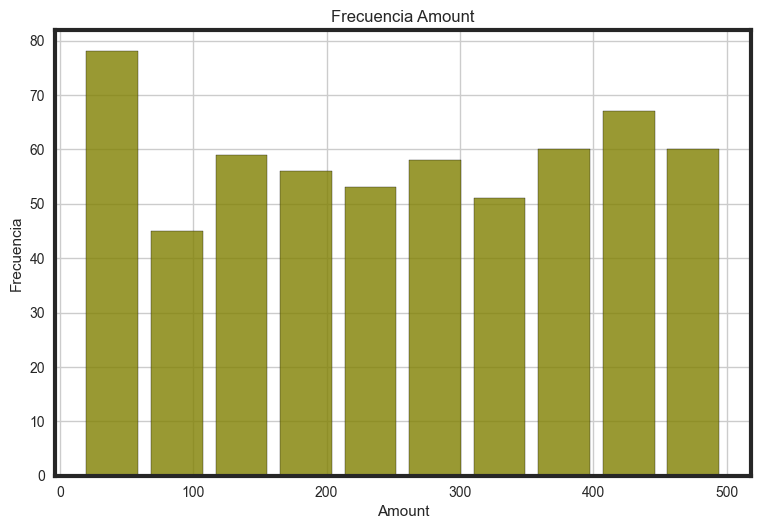

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(transactions['amount'], bins=10, color= "olive", edgecolor="black", alpha=0.8, rwidth=0.8)
plt.grid()
plt.title('Frecuencia Amount')
plt.ylabel('Frecuencia')
plt.xlabel('Amount');


Partimos de la idea de que nos interesa saber que monto de ventas se repite con más frecuencia. Es decir, por ejemplo: ¿Las ventas de 100€, serán las más habituales en nuestra empresa? 

Nos interesa saberlo para poder aplicar estrategias de venta en base a eso.

Al realizar el gráfico podemos ver como primer dato que nuestras ventas van de unos 20€ a unos 500€, no tenemos ventas ni mayores ni menores. El patrón parece ser bastante estable dentro de ese rango. Vemos que como poco, las ventas de unos 350€ son las que menos se repiten y las ventas que más se repiten son las de entre 20€-50€. En las primeras, la barra es la más pequeña, mientras en el monto de 20€-50€ la barra es la más alta superando las 50 veces que se repite esa venta. En segundo lugar, estarían las ventas de entre 410€-450€. La diferencia en cuanto a cantidad entre estas dos más habituales es bastante notable.

¿Qué decisiones podríamos tomar en base a estos datos? Por ejemplo, si las ventas que más se repiten son las de 50€ y pico y las de 400€ y pico, podríamos analizar el porqué de ese gap y aplicar estrategias para que las de 400€ y pico superen las de 50€ y pico. 

- Exercici 2
    
    Dues variables numèriques.

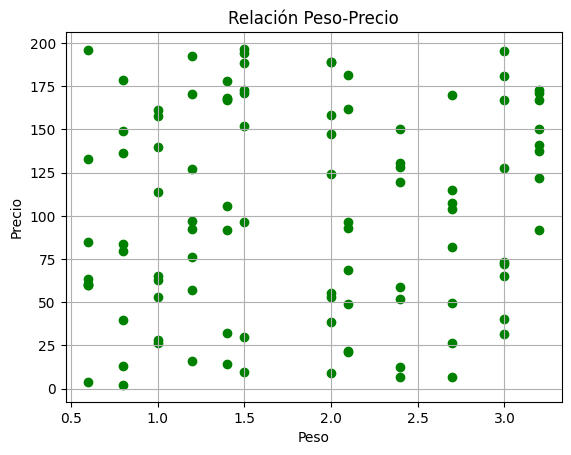

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
plt.scatter(products['Weight'],products['Price'], color='green')
plt.grid()
plt.title('Relación Peso-Precio')
plt.ylabel('Precio')
plt.xlabel('Peso')
plt.show()




Nos interesa analizar si hay alguna relación en cuanto a peso de los productos y su precio. Por ejemplo: ¿Serán los productos de mayor peso los que cuesten más? O por el contrario los productos de menos peso serán los que más cuestan?(si por ejemplo, en nuestro inventario tuviésemos joyas)

Al realizar el gráfico nos damos cuenta que esa relación no se cumple en nuestro caso, si fuese así los puntos representados estarían agrupados en la esquina superior derecha (si a más peso, más costaran) o en la esquina superior izquierda (si a menos peso, más costaran). En nuestro caso todos los puntos están dispersos, lo que indica que es indiferente cuanto pesan los productos en cuanto a su peso y viceversa.
Como dato curioso tenemos que no hay productos con peso que vayan de 1.5kg a 2.0kg porque vemos que ese gap en el gráfico está vacio.

Al no haber ningún tipo de patrón, no es un dato viable por el cual podamos aplicar estrategias de negocio.

- Exercici 3

    Una variable categòrica.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           275 non-null    object        
 1   name         275 non-null    object        
 2   surname      275 non-null    object        
 3   phone        275 non-null    object        
 4   email        275 non-null    object        
 5   birth_date   275 non-null    datetime64[ns]
 6   country      275 non-null    object        
 7   city         275 non-null    object        
 8   postal_code  275 non-null    object        
 9   address      275 non-null    object        
 10  region       275 non-null    object        
 11  age          275 non-null    int32         
dtypes: datetime64[ns](1), int32(1), object(10)
memory usage: 24.8+ KB
None
<class 'pandas.core.series.Series'>
Index: 23 entries, 23 to 45
Series name: None
Non-Null Count  Dtype
--------------  -----
23 non-

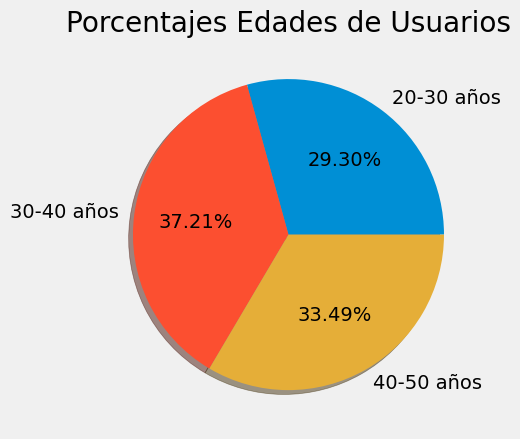

In [17]:
#Creamos una Serie paar saber la edad de los usuarios:
import pandas as pd
import matplotlib.pyplot as plt
users['age'] = pd.Series(pd.Timestamp.now().year - users['birth_date'].dt.year)

print(users.info())
users.head(10)

print(users.groupby('age').size().info())
print(users['age'].min())
print(users['age'].max())

#Las edades van de 23 a 45 y tenemos 22 edades en total, vamos a dividir las entradas por rangos para crear un gráfico numérico más sencillo:

veinte_treinta = users[(users['age']<30)].shape[0]
treinta_cuarenta =users[(users['age']>=30) & (users['age']>=39)].shape[0]
cuarenta_cincuenta = users[users['age']>=40].shape[0]

plt.style.use('fivethirtyeight')
plt.pie([veinte_treinta, treinta_cuarenta, cuarenta_cincuenta],
        labels =["20-30 años", "30-40 años","40-50 años"],
        autopct='%1.2f%%',
        shadow=True)
plt.title('Porcentajes Edades de Usuarios')
plt.show()

El departamento de marketing nos ha pedido saber cual es el mayor porcentaje de edades representados en nuestros clientes porque quieren lanzar una campaña publicitaria enfocada en esas edades. Nos comentan que, si se lo mostramos en decenas, por ejemplo, de 30-40 años ya es suficiente. 

Hemos consultado primero la menor y mayor edad de nuestros usuarios y vemos que va de 23 a 45 años. Por tanto, lo dividiremos de 20-30 años, 30-40 años y de 40-50 años.
Vemos el en gráfico que la mayoría de nuestros usuarios tienen entre 30 y 40 años, en concreto representan el 37.21%. Luego le siguen los usuarios de entre 40 y 50 años con un 33.49% y por último los usuarios de 20 a 30 años con una representación del 29.30%.
En realidad no hay tanta diferencia entre unos y otros, al menos de aquellos que tienen de entre 30 y 50, podemos sugerir al departamento de marketing que podría ampliar esa campaña publicitaria para también los clientes que lleguen hasta 50 años, porque para nosotros también es una parte importante.


- Exercici 4

    Una variable categòrica i una numèrica.

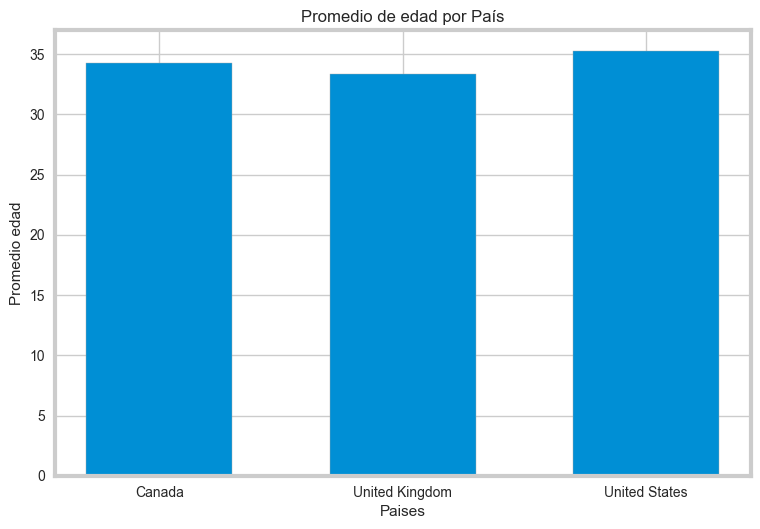

In [32]:
#Por cada pais, promedio de edad:

mean_age_by_country = users.groupby('country')['age'].mean()

#print(mean_age_by_country)
plt.style.use('seaborn-v0_8-notebook')
plt.bar(x=mean_age_by_country.index,
   height= mean_age_by_country.values,
   width=0.6,
   edgecolor="darkgrey")
plt.title('Promedio de edad por País')
plt.xlabel('Paises')
plt.ylabel('Promedio edad')
plt.show()




¿Qué promedio de edad deben tener nuestros clientes según el país de origen al que pertenecen? 

Somos conscientes de que nuestros usuarios provienen tan solo de tres países diferentes, que son Reino Unido, Estados Unidos y Canadá. Pero nos interesa saber cual e la edad promedio de dentro de cada uno de esos países para ver si hay diferencias. 
El gráfico muestra que no hay una diferencia significativa. A pesar de ello vemos que los usuarios más jóvenes pertenecen al Reino Unido con un promedio de unos 33-34 años. Le siguen los usuarios de Canadá con algo más de 34 años y, por último, con mayor edad tenemos a Canadá con un promedio algo mayor a 35 años.
No es un dato relevante como para aplicar una estrategia de negocio porque las edades son relativamente parecidas, tan solo hay una diferencia de un par de años entre los diferentes países.

- Exercici 5

    Dues variables categòriques.

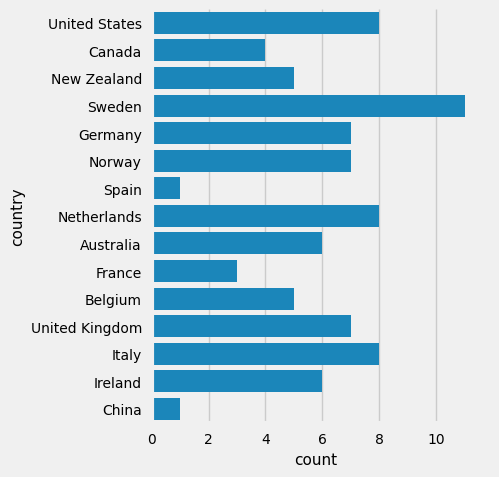

In [23]:
#Declinadas por país
import seaborn as sns

transactions_companies = pd.merge(transactions, companies, left_on='business_id', right_on='company_id')

transactions_companies.head()

sns.catplot(data=transactions_companies[transactions_companies['decline'] == 1],
            y='country',
            kind='count');


Desde el departamento de ventas nos han pedido cuantas ventas declinadas hay por país en cuanto a empresas(leer la *NOTA del siguiente ejercicio). Quieren saber si hay algún número elevado de declinadas que esté afectando a las ventas para poder establecer estrategias de mejora con ese país. 

Con el informe podemos ver que los países con menor número de ventas declinadas son Spain y China con solo una transacción declinada, mientras que Sweden es la que más tiene con 11. 

Nos damos cuenta que ventas nos tendría que haber pedido este dato también junto al número total de transacciones. 
Analizar solo el número de ventas declinadas no tiene sentido sin poderlo comparar también con el total. Es decir, no es lo mismo que de 100 ventas, salgan declinadas 2, que de 5 ventas salgan declinadas 2. El número de declinadas es el mismo en los dos ejemplos, pero el impacto en los resultados del segundo ejemplo es mucho mayor que el primero.

- Exercici 6
    
    Tres variables.

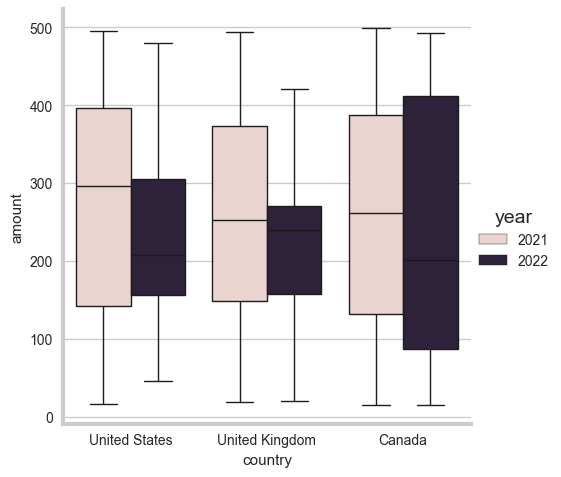

In [33]:
#Para el año 2021 y 2022, total de ventas por paises.

import seaborn as sns
import pandas as pd

transactions_usuarios = pd.merge(transactions,users,left_on='user_id', right_on='id')

transactions_usuarios['year'] = transactions['timestamp'].dt.year

sns.catplot(data=transactions_usuarios,
            kind='box',
            x='country',
            y='amount',
            hue='year');


*NOTA: Tanto para este ejercicio como para los siguientes en los que se muestra los países de Canadá, Reino Unido y Estados Unidos, hay que tener en cuenta que el análisis bajo estos tres países se hace a nivel de usuario, no de transacciones o de empresas. Si quisiéramos analizar los datos según países a nivel de transacciones deberíamos de trabajar con la longitud y latitud de la tabla de transacciones y si fuera a nivel de empresa deberíamos coger la serie de “country” que se encuentra en “companies”.

Desde dirección nos piden que hagamos un estudio de las ventas que han habido por país de usuarios separado por años. Lo primero que observamos en la gráfica es que no tenemos valores atípicos, si fuera así estarían representados en los extremos en forma de puntos. Lo que nos indica que los valores de las ventas están dentro de lo normal.

    Estados Unidos:

    . 2021:

. La mediana de ventas está cerca de los 300€.

. Podemos ver que la caja es bastante grande con lo cual nos indica que los valores de amount están bastante dispersos.

. Las ventas mínimas son de unos 20€ y las máximas llegan a prácticamente 500€.

    . 2022:

. La mediana está cerca de los 200€ lo que nos sugiere que las ventan han disminuido en comparación con 2021.

. La caja es más pequeña que en 2021, lo que indica menos variabilidad en las ventas. Los datos están más concentrados.

. Las ventas mínimas son algo mayor que en 2021 siendo de 50€ y ventas máximas un poco inferior a 500€, por tanto menor al 2021 de nuevo.

    Reino Unido:

    . 2021:

. La mediana de ventas está cerca de 250€.

. La variabilidad de los valores es relativamente grande porque vemos que la caja es bastante grande.

. Las ventas mínimas son de 20€ y las máximas de casi 500€.

    . 2022:

. La mediana de ventas está cerca de los 250€ como en el año anterior.

. En este año los valores no están tan dispersos como el año anterior porque la caja es mucho menor.

. Las ventas mínimas son igual que el año anterior mientras que las máximas a disminuido a unos 420€.

    Canadá:

    . 2021:

. La mediana de ventas está alrededor de  los 250€.

. Los valore siguen estando dispersos porque vemos que la caja para este año es grande.

. Las ventas mínimas son de 20€ y las máximas de casi 500€.

    . 2022:

. La mediana bajó a 200€.

. La variabilidad de los valores están más dispersos que el anterior.

. Las ventas mínimas y máximas están igual que el año anterior.

Conclusiones generales: Para los tres países hay una disminución de la mediana de las ventas en el 2022. Hay disminución de variabilidad en USA y UK, lo que puede indicar una reducción en las diferencias de comportamiento de compra entre los clientes. Y en cambio en Canadá hay un aumento de variabilidad, lo que puede indicar lo contrario. 


- Exercici 7

    Graficar un Pairplot.

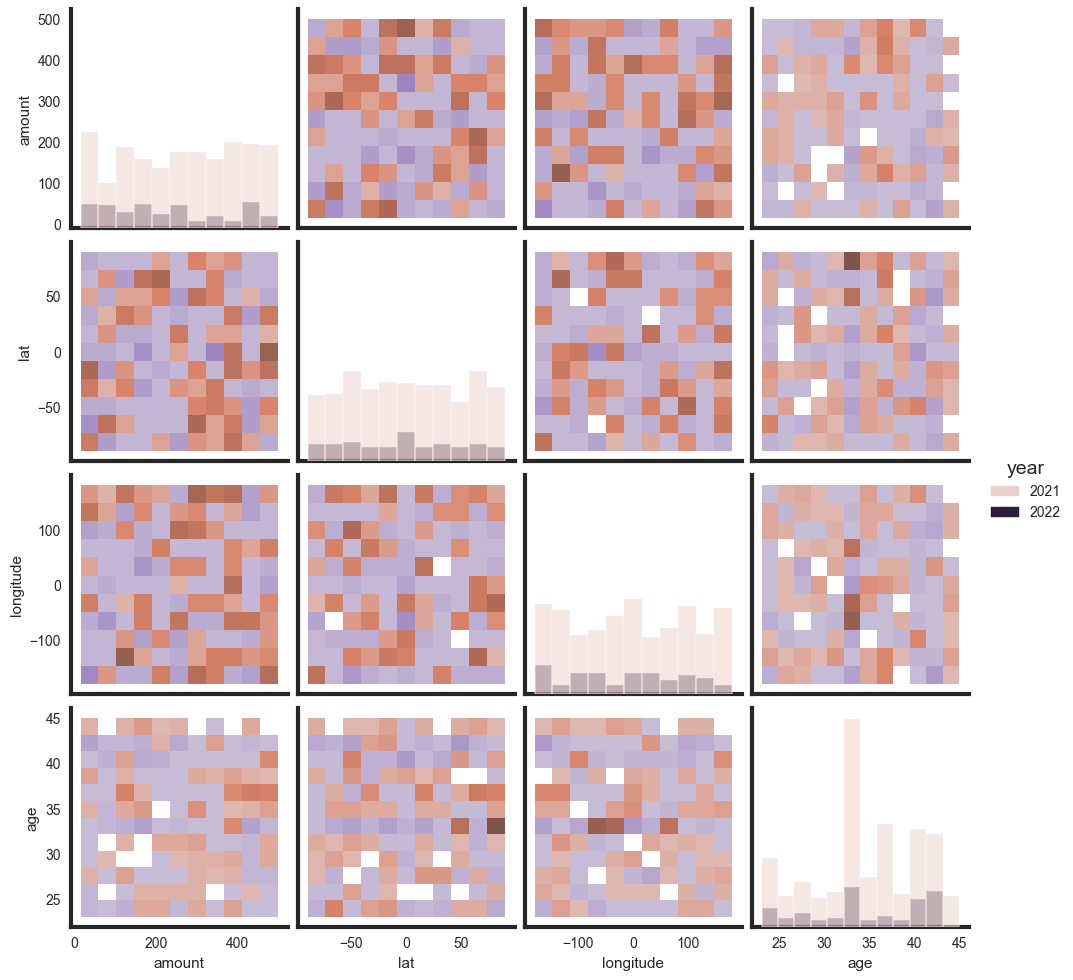

In [36]:
sns.set_style('white')

transactions_usuarios['year'] = transactions['timestamp'].dt.year

import seaborn as sns
sns.pairplot(data=transactions_usuarios, vars = ["amount","lat","longitude","age"],
             hue= 'year',
             kind = "hist")


El director de la empresa nos ha pedido que combinemos varias variables numéricas como amount, latitud, longitud y edad con el año 2021 y 2022. Para ver si hay alguna relación entre ellas. Sabemos que en este tipo de gráfico, a mayor intensidad de color de los puntos, mayor será su relación.

Empezamos con el análisis:

    . Distribución de la variable amount:

Vemos una dispersión considerable entre diferentes latitudes y longitudes. Aunque no parece haber una clara relación entre estas variables y la cantidad de transacciones, el patrón puede sugerir una ligera tendencia en los puntos más oscuros, pero están demasiado separados entre si como para sacar conclusiones.

    . Distribuciones de latitud y longitud:

En los gráficos donde se cruzan las variables de latitud y longitud, tampoco vemos una correlación clara. Si podemos sacar alguna mínima conclusión, sí que podríamos decir que en los puntos con colores más oscuros puede indicar que hay zonas geográficas con mayor número de transacciones.

    . Distribución de age:

Nos pasa lo mismo con la variable age: no vemos que haya una correlación fuerte con las demás variables numéricas. Hay ciertos agrupamientos en la edad de 30 y 40 años, lo que podría sugerirnos que hay por tanto un mayor porcentaje de esos usuarios, pero tampoco es algo significativo.

    . Tendencia por año:

2021 lo vemos en tonos rojizos/rosas, mientras que 2022 está representado en tonos violeta. Lo mismo que con las variables anteriores, parece que la distribución entre variables no tiene un patrón claro. Todo está distribuido de manera dispersa.

Como conclusión por tanto tenemos que estos no son datos que nos muestren ningún patrón y deberíamos descartarlos para cualquier estrategia de negocio.




## NIVEL 2

- Exercici 1

    Correlació de totes les variables numèriques.

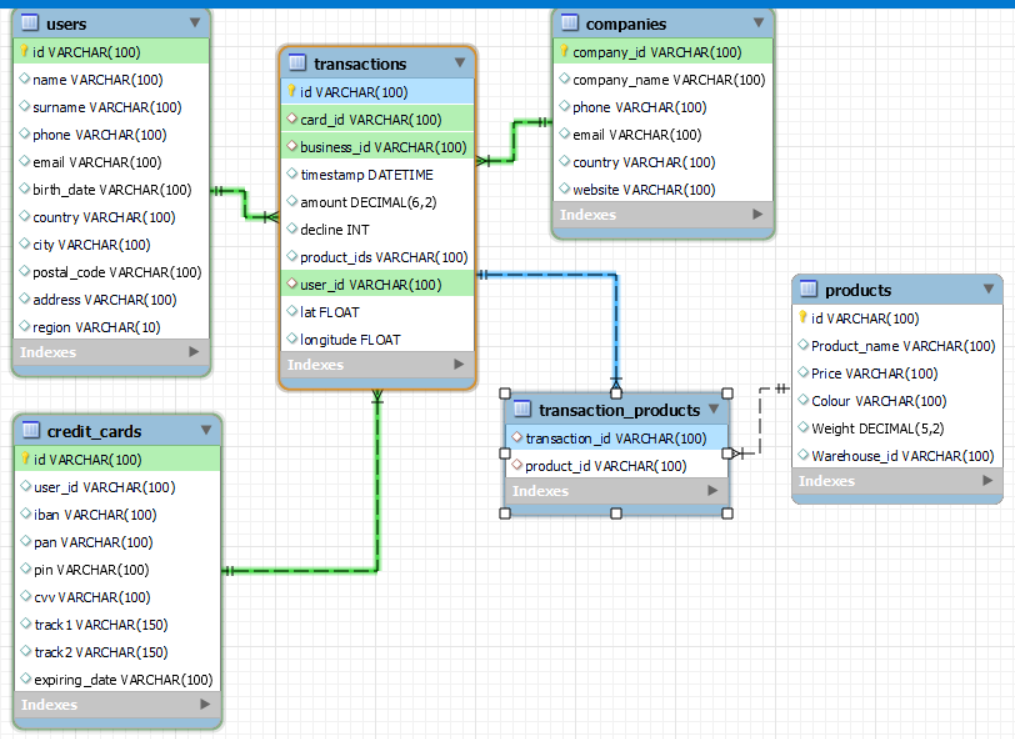

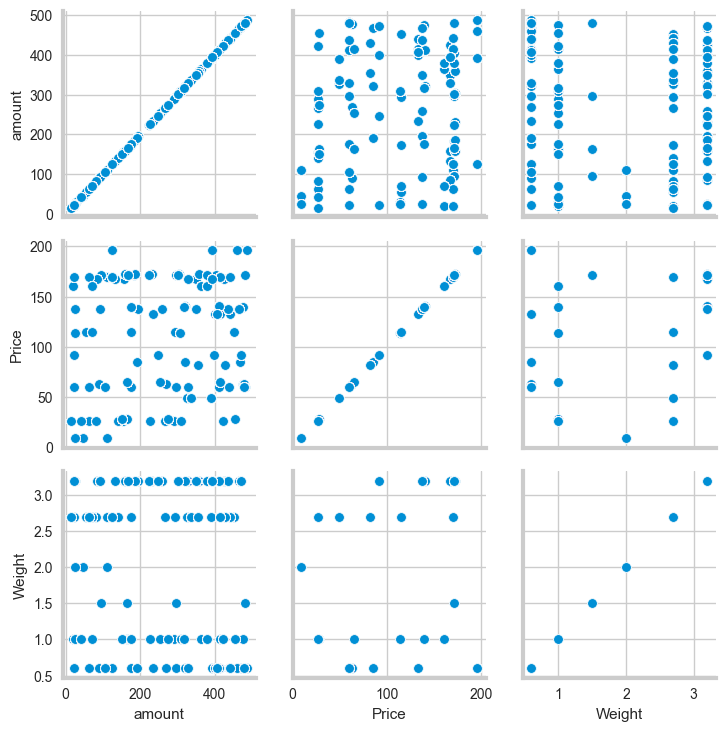

In [26]:
#Vamos a partir del modelo original, no vamos a utilizar los merge anteriores, ni la columna de la edad.
#Por tanto las variables númericas del modelo original serían amount, price y weight.

#hacemos los merge entre la tabla transactions y products:
trans_trans_products = pd.merge(transactions, transaction_products, left_on ='product_ids', right_on='product_id')

union_trans_products = pd.merge(trans_trans_products, products, left_on='product_id', right_on='id')

#Escogemos las variables que queremos:
variables_numéricas = ['amount','Price','Weight']

g = sns.PairGrid(union_trans_products[variables_numéricas])
g.map(sns.scatterplot)

Desde dirección siguen queriendo investigar si hay alguna otra relación entre variables numéricas y esta vez nos han pedido que analicemos las relaciones entre el peso, el precio y las ventas.

En este caso, después de sacar el gráfico ocurre lo mismo que con el pairplot que analizamos anteriormente. Los puntos, es decir, las relaciones, están distribuidas en los gráficos de manera que no están agrupados, sino dispersos. Eso nos indica que no hay un patrón claro a seguir, no se relacionan las unas con las otras de manera ordenada. Los huecos que vemos en algunos de los gráficos, como por ejemplo price y weight indica que no hay valores con esas características. 

Las unicas conclusiones que podemos sacar aquí son los rangos en los que se mueven cada una de las variables, por ejemplo: 

El peso de los productos está concentrado en rangos bajos, entre 0 y 3, lo que indica que no trabajan con productos muy pesados.
El histograma de Price muestra una tendencia de precios que oscilan entre los 0 y 200, algo más concentrados en ciertos precios como 90€, 140€ o 180€.
El histograma de amount refleja una distribución de transacciones de 0 a 500€.

- Exercici 2
    
    Implementa un jointplot.

In [27]:
transactions_usuarios.head()

,id_x,card_id,business_id,timestamp,amount,decline,product_ids,user_id,lat,longitude,...,phone,email,birth_date,country,city,postal_code,address,region,age,year
0,02C6201E-D90A-1859-B4EE-88D2986D3B02,CcU-2938,b-2362,2021-08-28 23:42:24,466.92,0,"71, 1, 19",92,81.9185,-12.5276,...,1-387-885-4057,vitae.aliquet@outlook.edu,1984-09-21,United States,Bozeman,61871,"P.O. Box 712, 7907 Est St.",USA,40,2021
1,0466A42E-47CF-8D24-FD01-C0B689713128,CcU-4219,b-2302,2021-07-26 07:29:18,49.53,0,"47, 97, 43",170,-43.9695,-117.5250,...,0800 1111,porttitor@icloud.ca,1987-05-15,United Kingdom,Coldstream,KY0 0DY,662-8112 Praesent Av.,UK,37,2021
2,063FBA79-99EC-66FB-29F7-25726D1764A5,CcU-2987,b-2250,2022-01-06 21:25:27,92.61,0,"47, 67, 31, 5",275,-81.2227,-129.0500,...,082-871-7248,convallis.ante.lectus@yahoo.com,1982-08-03,Canada,Richmond,R8H 2K2,8564 Facilisi. St.,CA,42,2022
3,0668296C-CDB9-A883-76BC-2E4C44F8C8AE,CcU-3743,b-2618,2022-01-26 02:07:14,394.18,0,"89, 83, 79",265,-34.3593,-100.5560,...,022-178-1548,arcu.eu@protonmail.org,1999-01-10,Canada,Oliver,B5T 7L6,"P.O. Box 289, 3192 Cursus St.",CA,25,2022
4,06CD9AA5-9B42-D684-DDDD-A5E394FEBA99,CcU-2959,b-2346,2021-10-26 23:00:01,279.93,0,"43, 31",92,33.7381,158.2980,...,1-387-885-4057,vitae.aliquet@outlook.edu,1984-09-21,United States,Bozeman,61871,"P.O. Box 712, 7907 Est St.",USA,40,2021


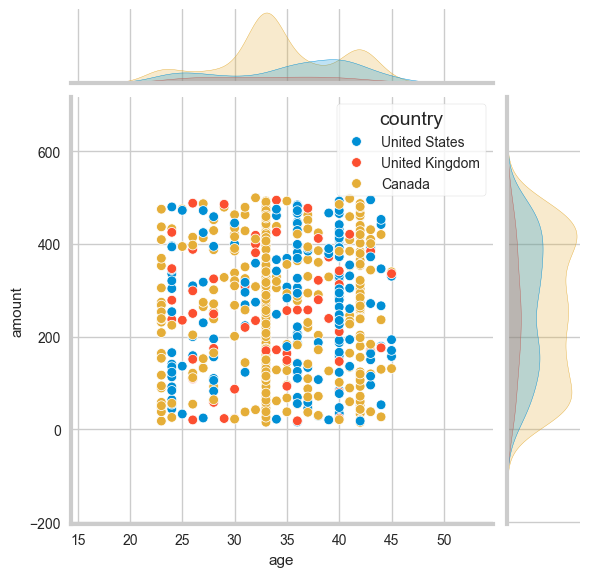

In [28]:
import seaborn as sns

sns.jointplot(data=transactions_usuarios,
              x='age',
              y='amount',
              hue='country')

Esta vez nos piden que saquemos un gráfico para averiguar si hay algún rango de edad de nuestros clientes que compre de manera más asidua, quieren ver las relaciones que hay entre las edades de nuestros clientes y las compras que realizan. Nos lo piden separado por países con respecto a los usuarios. 

Cuando sacamos el gráfico vemos que los puntos están distribuidos de manera uniforme a lo largo del gráfico, lo que indica que no hay una clara relación directa entre la edad y el valor de las ventas.
Las ventas también abarcan una amplia gama de cantidades en todos los países. Por lo tanto, no parece haber un grupo en concreto que sobresalga claramente con valores de ventas más altos o bajos.

En cuanto a los países estas son las conclusiones:

En Estados Unidos la distribución de ventas es dispersa en todo el rango de edades y valores. Seguimos sin ver un patrón claro de ventas concentradas por edad.
Reino Unido es similar a Estados Unidos, pero con una concentración algo menor en las ventas más bajas.
En Canadá vemos algo más de variabilidad en la cantidad de ventas y algo más concentrado por edades de entre 23, 34 y 42 años, pero aún así los resultados son bastante dispersos.

En el gráfico superior podemos ver la densidad de las ventas. Canadá es la que más densidad tiene en comparación con Estados Unidos y Reino Unido.
En el gráfico a la derecha vemos la densidad de edades, y la mayoría de los compradores parecen estar en la franja de edad entre los 30 y 40 años, sobre todo representado por Canadá. En Estados Unidos parece que el mayor rango de edad es entre 35 y 45 años, no de manera muy exagerada y en general no hay una gran diferencia entre UK y USA con respecto esta variable.

Conclusiones generales: Como hemos dicho no vemos una correlación directa entre la edad y las compras de los usuarios. Las ventas están bastante distribuidas en todos los rangos de edad. Canadá parece tener una mayor dispersión en ventas de montos más altos, mientras que Estados Unidos y Reino Unido tienen una distribución más equilibrada.
Las edades más comunes de los compradores están entre 30 y 40 años.


In [23]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


## NIVEL 3

- Exercici 1

    Implementa un violinplot combinat amb un altre tipus de gràfic.

<Axes: xlabel='country', ylabel='amount'>

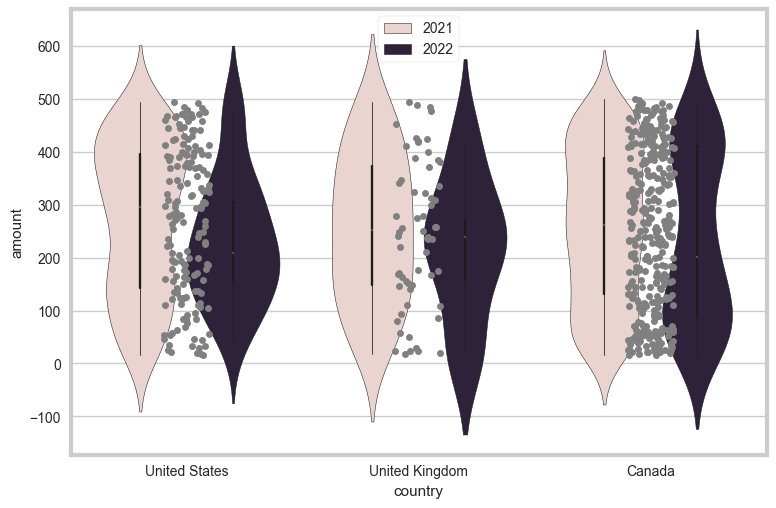

In [30]:
#Creamos una figura que tiene una columna y una fila:
fig, ax = plt.subplots(ncols=1, nrows=1)  

#Creamos el primer gráfico de violín:
sns.violinplot(data=transactions_usuarios,
               x='country',
               y='amount',
               hue='year')

#Y ahora el segundo gráfico:
sns.stripplot(data=transactions_usuarios,
              x='country',
              y='amount', 
              color= "grey") 


En el ejercicio 6 hicimos un análisis de estos mismos valores con un gráfico boxplot. La diferencia con este gráfico es que podemos ver con más detalle la densidad de los datos con respecto a 'amount'.
No analizaremos de nuevo a detalle el máximo, mínimo y medianas porque ya lo hicimos en el ejercicio anterior. En el violín estos datos están en la linea central y el pequeño punto que vemos en ella.

En cuanto a densidades podemos ver como en Estados Unidos la concentración de valores se encuentra para 2021 alrededor de los 400€ y para 2022 alrededor de los 180€. 
Para Reino Unido en 2021 parece que los valores están más concentrados de manera uniforme entre 400€ y 100€ y para 2022 alrededor de los 250€. Por último en Canadá para 2021 pasa algo parecido a Reino Unido, mientras que en 2022 la mayor concentración la vemos en 90€.

El segundo gráfico que vemos superpuesto tan solo nos indica las ventas por país, esta vez no está dividido por años.

A mayor concentración de puntos más ventas, por tanto en una conclusión general podemos ver que Canadá fue la primera, siguiéndole Estados Unidos y por último Reino Unido.


- Exercici 2

    Genera un FacetGrid per a visualitzar múltiples aspectes de les dades simultàniament.

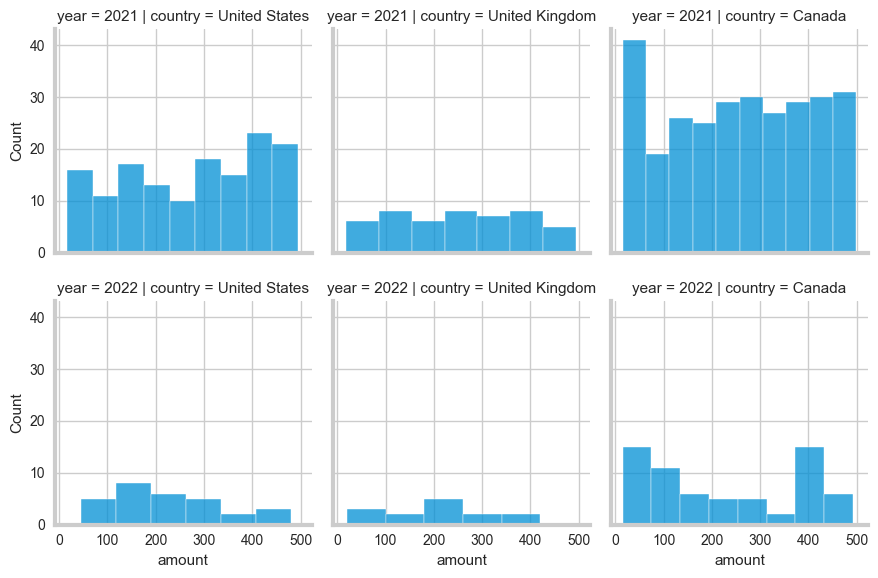

In [31]:

g = sns.FacetGrid(transactions_usuarios, col='country', row='year');
g.map(sns.histplot, 'amount')

En el primer ejercicio nos pidieron saber la frecuencia de la variable de amount. En esta ocasión nos interesa saber ese mismo dato, pero separado por país (con respecto a los usuarios) 2021 versus 2022.

Después de ver el gráfico sacamos las siguientes conclusiones:

    . Estados Unidos 2021 vs. 2022:

En 2021, las ventas tienen una distribución bastante dispersa, pero con una concentración algo mayor entre los rangos de 300 y 500. Por lo tanto, en ese año, las ventas más altas fueron frecuentes.
Para 2022, la distribución cambia bastante, con un número más alto de ventas pequeñas. La mayor parte de las ventas se concentran entre 100 y 200 con lo que podemos llegar a conclusiones como una disminución de las ventas generales en ese año o una preferencia por productos de menor valor.

    . Reino Unido (2021 vs. 2022):

Tanto para en el 2021 como para el 2022 las ventas están bastante equilibradas entre el rango de amount, pero de un año a otro vemos que hay mucha menos frecuencia, lo que indica una disminución de ventas en el 2022 y además distribuidos en los valores más bajos.

    . Canadá (2021 vs. 2022):

Canadá muestra un mayor número de ventas que el resto de los otros dos países. En 2021 aunque la distribución es bastante uniforme hay un pico en el rango más bajo del amount. En cambio, en 2022 las ventas en rangos bajos (entre 0 y 100) tienen más ocurrencias, pero también hay un repunte en el rango de 400-500, lo que indica una mezcla de ventas muy bajas y muy altas.

En general, parece que los patrones de ventas en 2022 muestran una tendencia a concentrarse en rangos más bajos de cantidad en comparación con 2021, con algunas excepciones en Canadá donde los valores altos persisten en ambos años.